#### hyperparameters

`pre_seq_length`: the number of given frames

`aft_seq_length`: the number of frames to predict

In [1]:
# #hide
# ! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab


# !pip install -Uqq fastai

In [1]:
pre_seq_length = 10
aft_seq_length = 10
batch_size = 16

<AxesSubplot:>

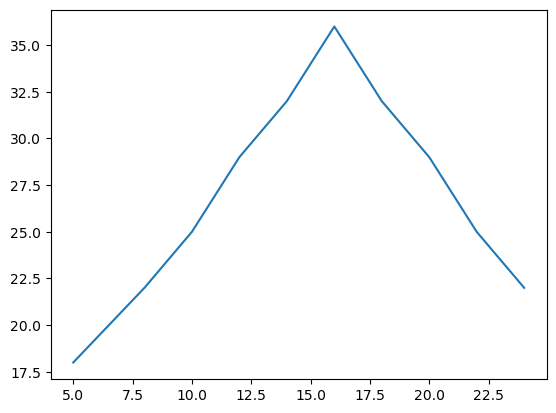

In [2]:
import torch



from fastai.vision.all import *

path = untar_data(URLs.MNIST)
path.ls()

files = get_image_files(path/'training')


digit_size = 28
image_size = 64
# step_length = 0.2
step_length = 0.2
N = len(files)



def get_random_trajectory(seq_length):
    "Generate a trajectory"
    canvas_size = image_size - digit_size
    x, y, v_x, v_y = np.random.random(4)
    out_x, out_y = [], []

    for i in range(seq_length):
        # Take a step along velocity.
        y += v_y * step_length
        x += v_x * step_length

        # Bounce off edges.
        if x <= 0:
            x = 0
            v_x = -v_x
        if x >= 1.0:
            x = 1.0
            v_x = -v_x
        if y <= 0:
            y = 0
            v_y = -v_y
        if y >= 1.0:
            y = 1.0
            v_y = -v_y
        out_x.append(x * canvas_size)
        out_y.append(y * canvas_size)

    return tensor(out_x, dtype=torch.uint8), tensor(out_y, dtype=torch.uint8)


x,y = get_random_trajectory(10)
plt.plot(x,y)



from random import choice
def get_rand_img():
    "Get one digit randomly"
    img = load_image(choice(files))
    return TensorImage(img)


timg = get_rand_img()


def generate_moving_digit(n_frames, image_size=64):
    "Move one digit on the canvas"
    digit_image = get_rand_img()
    xs, ys = get_random_trajectory(n_frames)
    canvas = torch.zeros((n_frames, 1, image_size, image_size), dtype=torch.uint8)
    for i,(x,y) in enumerate(zip(xs,ys)):
        canvas[i, 0, y:(y+digit_size),x:(x+digit_size)] = digit_image
    return canvas

def generate_moving_digits(n_frames, digits=1):
    "generate multiple digits"
    return torch.stack([generate_moving_digit(n_frames) for n in range(digits)]).max(dim=0)[0]


digits = generate_moving_digits(1000, 2)
# show_images(digits)


class ImageSeq(fastuple):
    @classmethod
    def create(cls, t, cl_type=TensorImageBW):
        return cls(tuple(cl_type(im) for im in t))
    def show(self, ctx=None, **kwargs):
        return show_image(torch.cat([t for t in self], dim=-1), ctx=ctx, **self[0]._show_args, figsize=(10,5), **kwargs)


img_seq = ImageSeq.create(digits)

img_seq.show()

## 10 --> 1

In [5]:
# import numpy as np

# # Assume `images` is the tuple containing 10,000 images of shape (1, 64, 64)
# # images = tuple(np.random.randn(1, 64, 64) for _ in range(10000))  # Replace with your actual data
# images = img_seq
# # Convert tuple to a list for easier manipulation
# images = list(images)

# # Create sequences
# X, Y = [], []
# for i in range(len(images) - 10):
#     X.append(np.array(images[i:i+10]))
#     Y.append(np.array(images[i+10]))

# # Convert to numpy arrays
# X = np.array(X)  # Shape: (num_sequences, 10, 1, 64, 64)
# Y = np.array(Y)  # Shape: (num_sequences, 1, 64, 64)

# # Calculate number of sequences
# num_sequences = len(X)

# # Split into train, validation, and test sets
# train_size = int(0.8 * num_sequences)
# val_size = int(0.1 * num_sequences)
# test_size = num_sequences - train_size - val_size

# X_train = X[:train_size]
# Y_train = Y[:train_size]

# X_val = X[train_size:train_size + val_size]
# Y_val = Y[train_size:train_size + val_size]

# X_test = X[train_size + val_size:]
# Y_test = Y[train_size + val_size:]

# # Create the dictionary
# datasets = {
#     'X_train': X_train,
#     'Y_train': Y_train,
#     'X_val': X_val,
#     'Y_val': Y_val,
#     'X_test': X_test,
#     'Y_test': Y_test
# }

# # Print dataset shapes to verify
# print("X_train shape:", datasets['X_train'].shape)
# print("Y_train shape:", datasets['Y_train'].shape)
# print("X_val shape:", datasets['X_val'].shape)
# print("Y_val shape:", datasets['Y_val'].shape)
# print("X_test shape:", datasets['X_test'].shape)
# print("Y_test shape:", datasets['Y_test'].shape)





# import matplotlib.pyplot as plt

# # Select the first sequence and its label
# sequence_index = 0
# X_sample = datasets['X_train'][sequence_index]  # Shape: (10, 1, 64, 64)
# Y_sample = datasets['Y_train'][sequence_index]  # Shape: (1, 64, 64)

# # Plot the 10 images in the sequence
# fig, axes = plt.subplots(2, 5, figsize=(15, 6))
# fig.suptitle('X_train Sequence and Corresponding Y_train Image', fontsize=16)

# for i in range(10):
#     ax = axes[i // 5, i % 5]
#     ax.imshow(X_sample[i, 0], cmap='gray')
#     ax.set_title(f'Frame {i}')
#     ax.axis('off')

# # Show the corresponding label image (11th frame)
# fig, ax = plt.subplots(figsize=(6, 6))
# ax.imshow(Y_sample[0], cmap='gray')
# ax.set_title('Y_train (10th Frame)')
# ax.axis('off')

# plt.show()

X_train shape: (792, 10, 1, 64, 64)
Y_train shape: (792, 1, 64, 64)
X_val shape: (99, 10, 1, 64, 64)
Y_val shape: (99, 1, 64, 64)
X_test shape: (99, 10, 1, 64, 64)
Y_test shape: (99, 1, 64, 64)


## 10 --> 10

X_train shape: (784, 10, 1, 64, 64)
Y_train shape: (784, 10, 1, 64, 64)
X_val shape: (98, 10, 1, 64, 64)
Y_val shape: (98, 10, 1, 64, 64)
X_test shape: (99, 10, 1, 64, 64)
Y_test shape: (99, 10, 1, 64, 64)


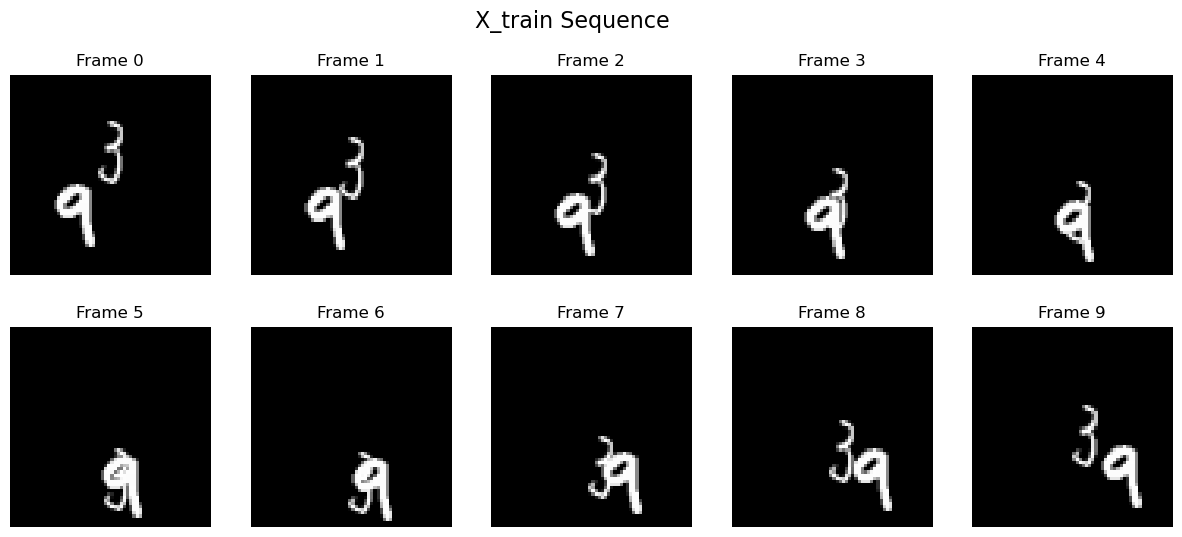

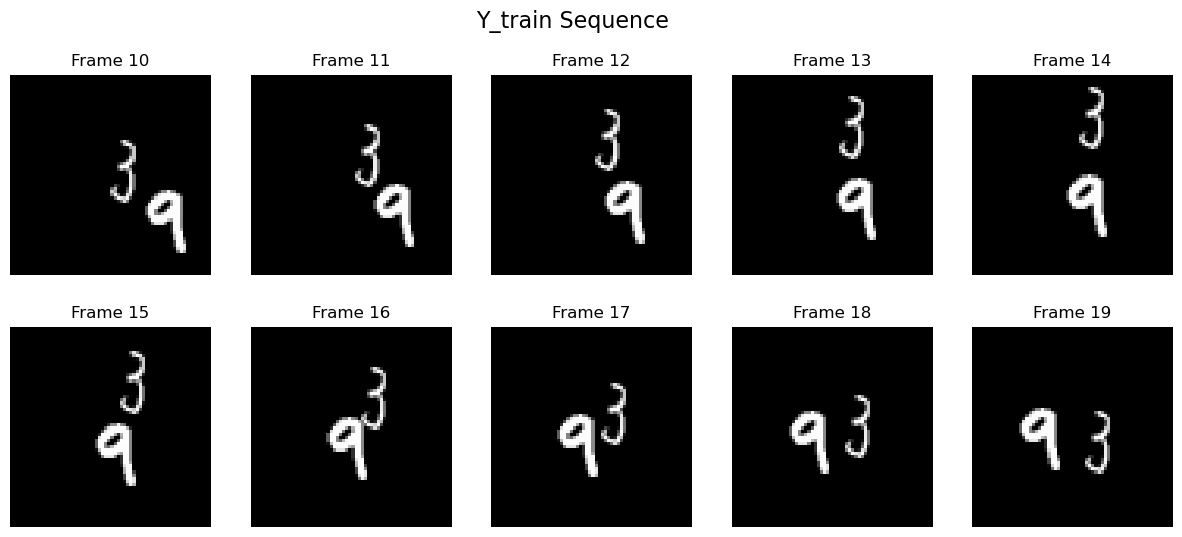

In [3]:
import numpy as np

# Assume `images` is the tuple containing 10,000 images of shape (64, 64)
# images = tuple(np.random.randn(64, 64) for _ in range(10000))  # Replace with your actual data
images = img_seq  # Replace `img_seq` with your actual image sequence
# Convert tuple to a list for easier manipulation
images = list(images)

# Create sequences of 10 frames for X and next 10 frames for Y
X, Y = [], []
sequence_length = 10  # Number of frames in each input and output sequence

for i in range(len(images) - 2 * sequence_length + 1):
    X.append(np.array(images[i:i + sequence_length]))
    Y.append(np.array(images[i + sequence_length:i + 2 * sequence_length]))

# Convert lists to numpy arrays
X = np.array(X)  # Shape: (num_sequences, sequence_length, 64, 64)
Y = np.array(Y)  # Shape: (num_sequences, sequence_length, 64, 64)

# Calculate number of sequences
num_sequences = len(X)

# Split into train, validation, and test sets
train_size = int(0.8 * num_sequences)
val_size = int(0.1 * num_sequences)
test_size = num_sequences - train_size - val_size

X_train = X[:train_size]
Y_train = Y[:train_size]

X_val = X[train_size:train_size + val_size]
Y_val = Y[train_size:train_size + val_size]

X_test = X[train_size + val_size:]
Y_test = Y[train_size + val_size:]

# Create the dictionary
datasets = {
    'X_train': X_train,
    'Y_train': Y_train,
    'X_val': X_val,
    'Y_val': Y_val,
    'X_test': X_test,
    'Y_test': Y_test
}

# Print dataset shapes to verify
print("X_train shape:", datasets['X_train'].shape)  # Expecting (train_size, 10, 64, 64)
print("Y_train shape:", datasets['Y_train'].shape)  # Expecting (train_size, 10, 64, 64)
print("X_val shape:", datasets['X_val'].shape)      # Expecting (val_size, 10, 64, 64)
print("Y_val shape:", datasets['Y_val'].shape)      # Expecting (val_size, 10, 64, 64)
print("X_test shape:", datasets['X_test'].shape)    # Expecting (test_size, 10, 64, 64)
print("Y_test shape:", datasets['Y_test'].shape)    # Expecting (test_size, 10, 64, 64)




import matplotlib.pyplot as plt

# Select the first sequence and its label
sequence_index = 0
X_sample = datasets['X_train'][sequence_index]  # Shape: (10, 64, 64)
Y_sample = datasets['Y_train'][sequence_index]  # Shape: (10, 64, 64)

# Plot the 10 images in the sequence X_train
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('X_train Sequence', fontsize=16)

for i in range(10):
    ax = axes[i // 5, i % 5]
    ax.imshow(X_sample[i][-1], cmap='gray')
    ax.set_title(f'Frame {i}')
    ax.axis('off')

# Plot the 10 images in the sequence Y_train
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Y_train Sequence', fontsize=16)

for i in range(10):
    ax = axes[i // 5, i % 5]
    ax.imshow(Y_sample[i][-1], cmap='gray')
    ax.set_title(f'Frame {i + 10}')
    ax.axis('off')

plt.show()



In [4]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.chdir('/home/drajani/Desktop/OpenSTL')

!python -q setup.py install

running install
/home/drajani/.local/lib/python3.10/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/home/drajani/.local/lib/python3.10/site-packages/setuptools/command/easy_install.py:156: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
error: can't create or remove files in install directory

The following error occurred while trying to add or remove files in the
installation directory:

    [Errno 13] Permission denied: '/usr/local/lib/python3.10/dist-packages/test-easy-install-1170824.write-test'

The installation directory you specified (via --install-dir, --prefix, or
the distutils default setting) was:

    /usr/local/lib/python3.10/dist-packages/

Perhaps your account does not have write access to this directory?  If the
installation directory is a system-owned dir

In [5]:
train_x, train_y = datasets['X_train'], datasets['Y_train']
print(train_x.shape)

(784, 10, 1, 64, 64)


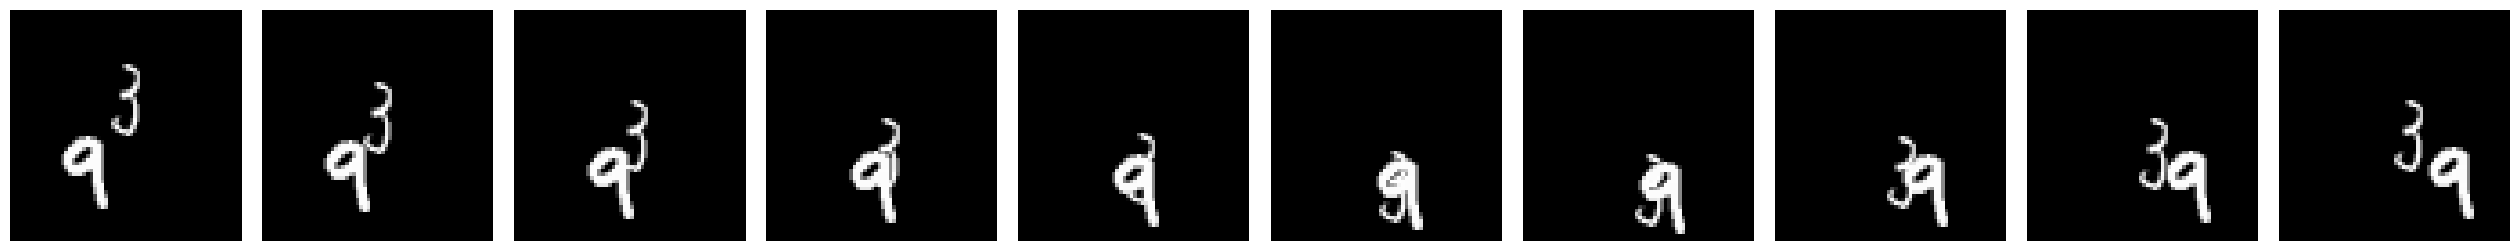

In [6]:
from openstl.utils import show_video_line

# show the given frames from an example
example_idx = 0
show_video_line(train_x[example_idx], ncols=pre_seq_length, vmax=0.6, cbar=False, out_path=None, format='png', use_rgb=True)

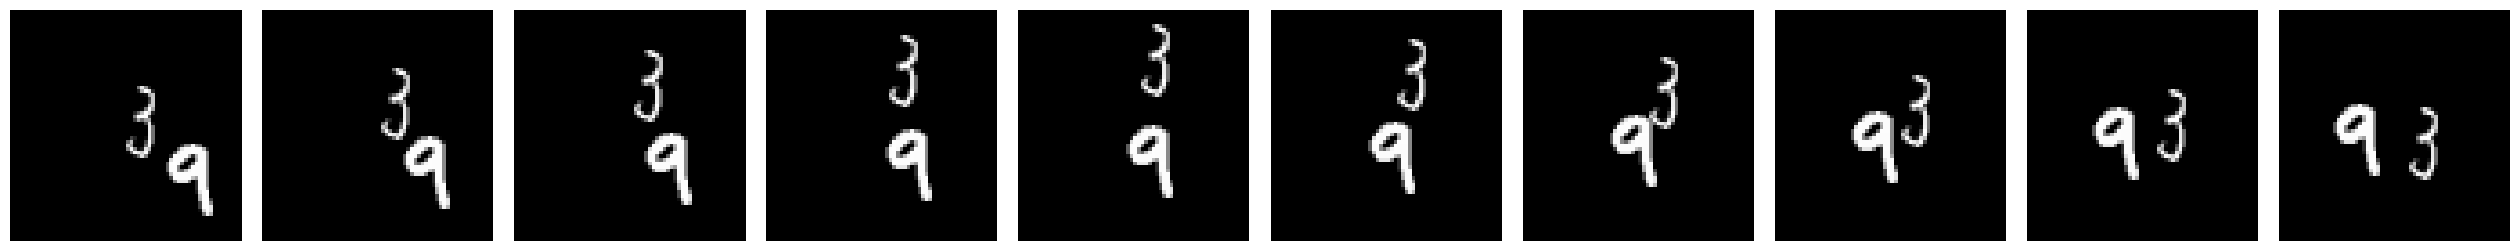

In [7]:
# show the future frames from an example
example_idx = 0
show_video_line(train_y[example_idx], ncols=aft_seq_length, vmax=0.6, cbar=False, out_path=None, format='png', use_rgb=True)

## 2. Utilize custom data

In [8]:
import torch
from torch.utils.data import Dataset


class CustomDataset(Dataset):
    def __init__(self, X, Y, normalize=False, data_name='custom'):
        super(CustomDataset, self).__init__()
        self.X = X
        self.Y = Y
        self.mean = None
        self.std = None
        self.data_name = data_name

        if normalize:
            # get the mean/std values along the channel dimension
            mean = data.mean(axis=(0, 1, 2, 3)).reshape(1, 1, -1, 1, 1)
            std = data.std(axis=(0, 1, 2, 3)).reshape(1, 1, -1, 1, 1)
            data = (data - mean) / std
            self.mean = mean
            self.std = std

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, index):
        data = torch.tensor(self.X[index]).float()
        labels = torch.tensor(self.Y[index]).float()
        return data, labels




X_train, X_val, X_test, Y_train, Y_val, Y_test = datasets['X_train'], datasets[
    'X_val'], datasets['X_test'], datasets['Y_train'], datasets['Y_val'], datasets['Y_test']

train_set = CustomDataset(X=X_train, Y=Y_train)
val_set = CustomDataset(X=X_val, Y=Y_val)
test_set = CustomDataset(X=X_test, Y=Y_test)




dataloader_train = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True, pin_memory=False)
dataloader_val = torch.utils.data.DataLoader(
    val_set, batch_size=batch_size, shuffle=True, pin_memory=False)
dataloader_test = torch.utils.data.DataLoader(
    test_set, batch_size=batch_size, shuffle=True, pin_memory=False)

## 3. Train and evaluate

In [9]:
# custom_training_config = {
#     'pre_seq_length': pre_seq_length,
#     'aft_seq_length': aft_seq_length,
#     'total_length': pre_seq_length + aft_seq_length,
#     'batch_size': batch_size,
#     'val_batch_size': batch_size,
#     'epoch': 100,
#     'lr': 1e-3,
#     'metrics': ['mse', 'mae'],

#     'ex_name': 'custom_exp',
#     'dataname': 'custom',
#     'in_shape': [pre_seq_length, 1, 64,64],
# }

# custom_model_config = {
#     'method' : 'TAU',
#     # model
#     'spatio_kernel_enc' : 3,
#     'spatio_kernel_dec' : 3,
#     'model_type' : 'tau',
#     'hid_S' : 128,
#     'hid_T' : 512,
#     'N_T' : 8,
#     'N_S' :8,
#     'alpha' : 0.1,
#     # training
#     'drop_path' : 0,
#     'sched' : 'onecycle'
# }







custom_training_config = {
    'pre_seq_length': pre_seq_length,
    'aft_seq_length': aft_seq_length,
    'total_length': pre_seq_length + aft_seq_length,
    'batch_size': batch_size,
    'val_batch_size': batch_size,
    'epoch': 3,
    'lr': 0.001,   
    'metrics': ['mse', 'mae'],

    'ex_name': 'custom_exp__2',
    'dataname': 'custom__2',
    'in_shape': [pre_seq_length, 1, 64,64],
}

custom_model_config = {
    # For MetaVP models, the most important hyperparameters are: 
    # N_S, N_T, hid_S, hid_T, model_type
    'method': 'SimVP',
    # Users can either using a config file or directly set these hyperparameters 
    'config_file': '/home/drajani/Desktop/OpenSTL/configs/mmnist/simvp/SimVP_gSTA.py',
    
    # Here, we directly set these parameters
    'model_type': 'gSTA',
    'N_S': 4,
    'N_T': 8,
    'hid_S': 64,
    'hid_T': 256
}

In [1]:
from openstl.api import BaseExperiment
from openstl.utils import create_parser, default_parser

args = create_parser().parse_args([])
config = args.__dict__

# update the training config
config.update(custom_training_config)
# update the model config
config.update(custom_model_config)
# fulfill with default values
default_values = default_parser()
for attribute in default_values.keys():
    if config[attribute] is None:
        config[attribute] = default_values[attribute]


print('done')

exp = BaseExperiment(args, dataloaders=(dataloader_train, dataloader_val, dataloader_test), strategy='auto')
print('done2')


ModuleNotFoundError: No module named 'openstl'

In [24]:
from openstl.api import BaseExperiment
from openstl.utils import create_parser, default_parser

args = create_parser().parse_args([])
config = args.__dict__

print('Flag_1')

# update the training config
config.update(custom_training_config)
print('Flag_2')

# update the model config
config.update(custom_model_config)
print('Flag_3')

# fulfill with default values
default_values = default_parser()
for attribute in default_values.keys():
    if config[attribute] is None:
        config[attribute] = default_values[attribute]

print('Flag_3a')

exp = BaseExperiment(args, dataloaders=(dataloader_train, dataloader_val, dataloader_test), strategy='auto')
print('Flag_4')

Seed set to 42


Flag_1
Flag_2
Flag_3
Flag_3a


In [2]:

!nvidia-smi

Tue Jul  2 21:38:06 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX A6000               Off | 00000000:21:00.0 Off |                    0 |
| 38%   66C    P2             126W / 300W |  30705MiB / 46068MiB |      1%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### 3.3 Start training and evaluation

With everything in place, we are now ready to start training and evaluation. 

Here we go!

In [41]:
# print('>'*35 + ' training ' + '<'*35)
# exp.train()

print('>'*35 + ' testing  ' + '<'*35)
exp.test()

You are using a CUDA device ('NVIDIA RTX A6000') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> testing  <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


2024-07-01 19:56:42.471745: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-01 19:56:43.130967: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: |          | 0/? [00:00<?, ?it/s]

mse:8420682.0, mae:40401.0546875


## Visualization

By employing the `show_video_line` and `show_video_gif_multiple` functions provided by `OpenSTL`, we can visualize the input, ground truth, and predicted frames, as well as generate corresponding GIFs.

### 4.1 Visualize in a line

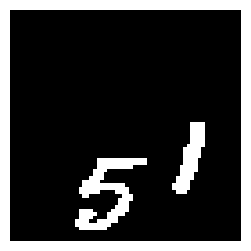

In [42]:
import numpy as np
from openstl.utils import show_video_line

# show the given frames from an example
inputs = np.load('./work_dirs/custom_exp/saved/inputs.npy')
preds = np.load('./work_dirs/custom_exp/saved/preds.npy')
trues = np.load('./work_dirs/custom_exp/saved/trues.npy')

example_idx = 10
show_video_line(trues[example_idx], ncols=aft_seq_length, vmax=0.6, cbar=False, out_path=None, format='png', use_rgb=True)

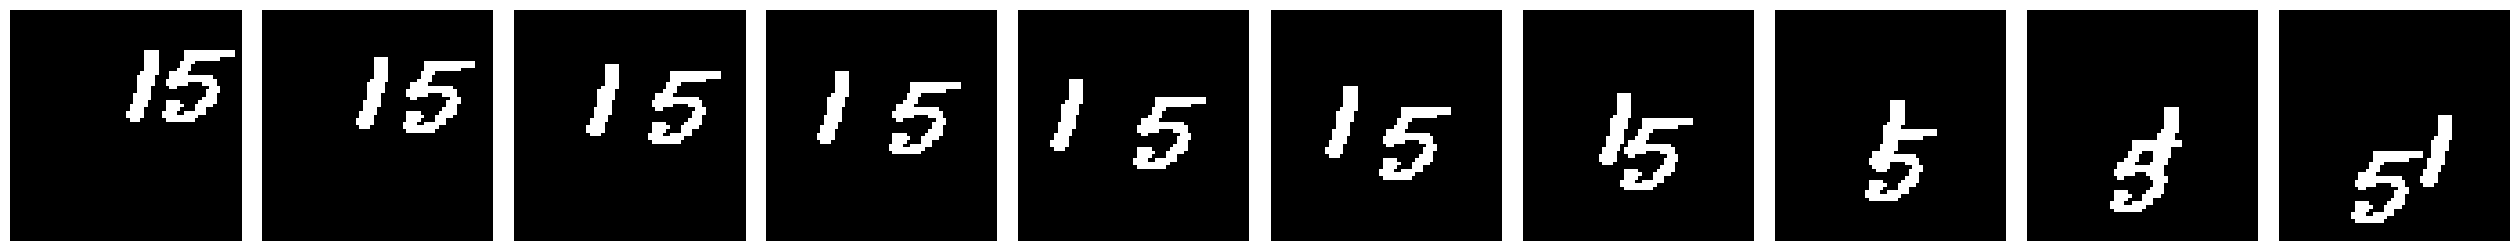

In [43]:
show_video_line(inputs[example_idx], ncols=pre_seq_length, vmax=0.6, cbar=False, out_path=None, format='png', use_rgb=True)

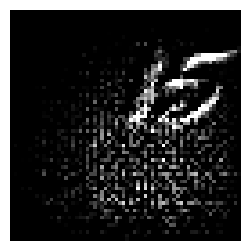

In [44]:
example_idx = 10
show_video_line(preds[example_idx], ncols=aft_seq_length, vmax=0.6, cbar=False, out_path=None, format='png', use_rgb=True)

In [46]:
def normalize_to_255(arr):
    # Ensure the array is in float for accurate division
    arr = arr.astype(np.float32)
    
    # Find the minimum and maximum values in the array
    min_val = np.min(arr)
    max_val = np.max(arr)
    
    # Normalize the array to the 0-1 range
    normalized_arr = (arr - min_val) / (max_val - min_val)
    
    # Scale the normalized values to the 0-255 range
    scaled_arr = normalized_arr * 255.0
    
    # Convert to uint8 type
    scaled_arr = scaled_arr.astype(np.uint8)
    
    return scaled_arr

In [47]:
preds = normalize_to_255(preds)

### 4.2 Generate a GIF

In [ ]:
from openstl.utils import show_video_gif_multiple

example_idx = 0
show_video_gif_multiple(inputs[example_idx], trues[example_idx], preds[example_idx], use_rgb=True, out_path='example.gif')